# Production Decline Analysis: Chapter 1







** Production decline analysis is a  traditional means of identifying well production problems and predicting well performance and life based on real production data. It uses empirical decline models that have little fundamentel justifications. These models include the following:

* Exponential decline (constant fractional decline)
* Harmonic decline
* Hyperbolic decline

# 1. Hyperbolic-Decline Model

The Most Generic model of all. The constants b and d are determined by production data.

$ \frac{1}{q}\frac{dq}{dt} = -bq^d $


0<d<1: Hyperbolic Model | d=0: Exponential Model | d=1: Harmonic Model

### Example 1: Exponential Decline

Given that a well has declined from 100 stb/day to 96 stb/day during a 1-month period, use the exponential decline model to perform the following task:

1. Predict the production rate after 11 more months.
2. Calculate the amount of oil produced during the first year.
3. Project the yearly production for the well for the 5 years.

In [145]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Decline Rate b 

$ b = \frac{log(q_0/q_1)}{t_1-t_0} $

$ q_0 $ = initial flow rate

$q_1$ = final flow rate

$ t_1$ = final time

$ t_0 $ = initial time

In [146]:
## Calculating decline rate for the first month period

t_1m = 1 # month
q_1m = 96 # stb/d

t_0m = 0 # month
q_0m = 100 #stb/d


b = np.log(q_0m/q_1m)/(t_1m - t_0m)

print(f"The Decline Rate b is {b} /month ")



The Decline Rate b is 0.0408219945202552 /month 


Flow Rate calculator

$ Q = q_0 ^{(-bt)} $

$ Q$ = flow rate 

$ q_0$ = initial flow rate

$ t $  = months

$b$  = decline rate

In [147]:
# Now using this per month decline rate, we can calculate the flow Rate at the end of 1 year

def q_calculator_exp(month):
    
    Q = q_0m*np.exp(-month*b)
    
    return Q
q_12m  = q_calculator_exp(12)

print(f"The flow rate at the end of 12 months is: {q_12m} STB/Day")


The flow rate at the end of 12 months is: 61.27097573297669 STB/Day


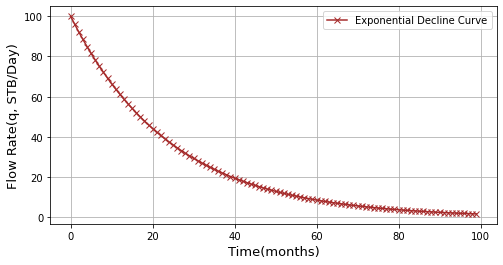

In [148]:
# Lets visualize how this flowrate v/s time lools like.

t = np.arange(0,100,1)

q = q_calculator_exp(t)

plt.figure(figsize=(8,4))
plt.style.use('default')
plt.plot(t,q, marker ='x', color='brown', label='Exponential Decline Curve')

plt.xlabel('Time(months)', size=13)
plt.ylabel('Flow Rate(q, STB/Day)', size=13)
plt.legend()
plt.grid()
plt.show()

In [149]:
# Produvtion rate after 11 more moths - Means at the end of 1 year. (1+11=12)

# At the end of 5 years, Total Months = 5*12==60 months

q_5yrs = q_calculator_exp(60)

print(f"The flowrate at the end of 5yrs is: {q_5yrs} STB/Day")

The flowrate at the end of 5yrs is: 8.635231448510442 STB/Day


## Calculation of Cumulative Production

> ### $ N_{p} = \frac{q_0-q_0 e^{-bt} } {b}$

In [150]:
def Np_exp(t):
    
    Np = (q_0m - q_0m*np.exp(-b*t))/b
    
    return Np

Np_monthwise = Np_exp(t)

In [151]:
# Amount of oil produced in the 1 year period

Np_1yr = Np_exp(12)

print(f"The amount of oil produced in the first year is: {Np_1yr} STB")

The amount of oil produced in the first year is: 948.7293485330955 STB


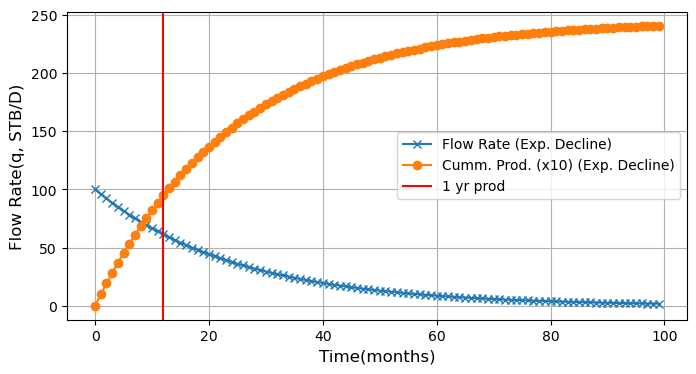

In [152]:
plt.figure(figsize=(8,4))
plt.style.use('default')

plt.plot(t,q, marker='x', label='Flow Rate (Exp. Decline)')
plt.plot(t,Np_monthwise/10, marker='o', label='Cumm. Prod. (x10) (Exp. Decline)')

Np_1yr = Np_exp(12)
Np_2yr = Np_exp(24)
Np_3yr = Np_exp(36)
Np_4yr = Np_exp(48)
Np_5yr = Np_exp(60)

plt.axvline(12,c='red', label='1 yr prod')

plt.ylabel('Flow Rate(q, STB/D)', size=12)
plt.xlabel('Time(months)', size=12)

plt.grid()
plt.legend()
plt.show()

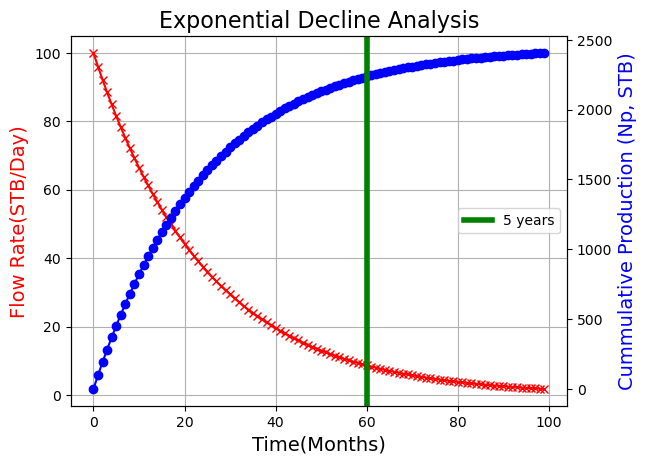

In [153]:
# Create figure and axis objects with subplots()

fig, ax = plt.subplots()
# make a plot
ax.plot(t,q, color='red', marker ='x')
#set x-axis label
ax.set_xlabel('Time(Months)', size=14)
# set y-axis label
ax.set_ylabel('Flow Rate(STB/Day)', color='red', size=14)
ax.grid()


ax2=ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(t,Np_monthwise, color='blue', marker='o')
ax2.set_ylabel('Cummulative Production (Np, STB)', color='blue',size=14)
ax2.axvline(60,color='green',lw=4, label='5 years')
ax2.legend(loc='center right')

plt.title('Exponential Decline Analysis', size=16)
plt.show()

# Chapter 2: All Models and Full - Proof DCA Workflow


## A. Harmonic Model

>### $ \frac{1}{q} \frac{dq}{dt} = -bq $

>### $ q = \frac{q_0}{1+bt}$

## A.1 Basis For Log-Log diagnosis of Harmonic Decline : log-log straight line

>### $ln({q}) = ln({q_0}) - ln({1 + bt})$

### $ N_p  = \frac{q_0}{b}ln({1 + bt}) = \frac{q_0}{b}[ln({q_0})- ln({q})]$

## B. Hyperbolic Model

> ### $ q = \frac{q_0}{(1 + bdt) ^ {1/d}}$

Here, a = 1/d


## $ q =\frac{q_0}{(1+\frac{b}{a}t) ^a}$

## $ N_p = \frac{b}{b(a-1)}[q_0 - q(1 + \frac{b}{a}t)]$

In [16]:
##########################################################

## Example 2: DCA workflow


For the data given, identify a suitable decline model, determine model parameters, and project production rate until a marginal rate of 25 stb/day is reached

In [18]:
df = pd.read_csv('pdc.csv')

In [19]:
df.head()

,T(days),q(Mscf/d)
0,30,413.3
1,60,392.8
2,90,375.9
3,120,371.3
4,150,377.5


In [21]:
t = df['T(days)'].values
q = df['q(Mscf/d)'].values

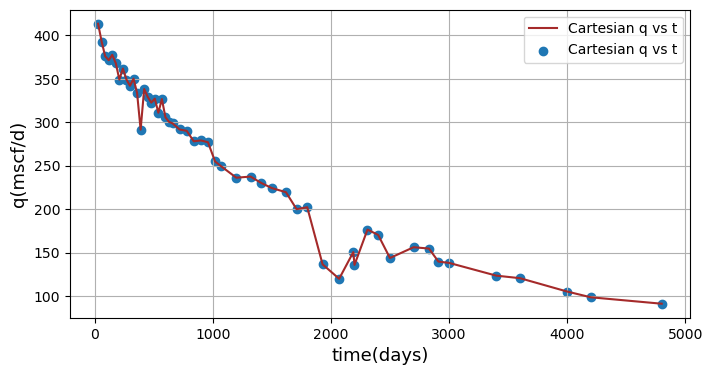

In [29]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(t,q, label='Cartesian q vs t', color='brown')
plt.scatter(t,q, label = 'Cartesian q vs t')


#plt.plot(np.log(t),q, label='Semi-log q vs t', color='green')
#plt.scatter(np.log(t), np.log(q),color='green')

plt.xlabel('time(days)',size=13)
plt.ylabel('q(mscf/d)',size=13)
plt.legend()
plt.grid()

In [33]:
# Lets Check if it is really exponential or not.
# We know in exponential decline, the b is constant. b = -dq/q/dt

df['dq'] = np.zeros(len(df))
df['dq'].iloc[1:] = -np.diff(df['q(Mscf/d)'])

df['dt'] = np.zeros(len(df))
df['dt'].iloc[1:] = np.diff(df['T(days)'])

df['-dq/(qdt)'] = np.round(df['dq']/df['q(Mscf/d)']*df['dt'], decimals=3)

df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9648\464346530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dq'].iloc[1:] = -np.diff(df['q(Mscf/d)'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9648\464346530.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'].iloc[1:] = np.diff(df['T(days)'])


,T(days),q(Mscf/d),dq,dq,dt,-dq/(qdt)
0,30,413.3,0.0,0.0,0.0,0.000
1,60,392.8,0.0,20.5,30.0,1.566
2,90,375.9,0.0,16.9,30.0,1.349
3,120,371.3,0.0,4.6,30.0,0.372
4,150,377.5,0.0,-6.2,30.0,-0.493


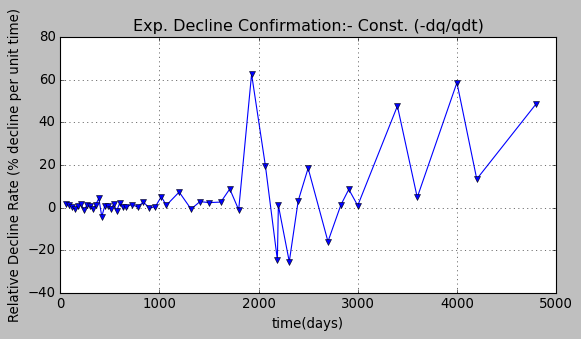

In [34]:
plt.style.use('classic')
plt.figure(figsize=(8,4))

plt.plot(df['T(days)'][1:], df['-dq/(qdt)'][1:], marker ='v')
plt.xlabel('time(days)',size=12)
plt.ylabel('Relative Decline Rate (% decline per unit time)', size=12)

plt.title('Exp. Decline Confirmation:- Const. (-dq/qdt)')

plt.grid()
plt.show()

# Production Forecasting

Now that we've confirmed the Exponential Decline, we can forecast production rates for the future.

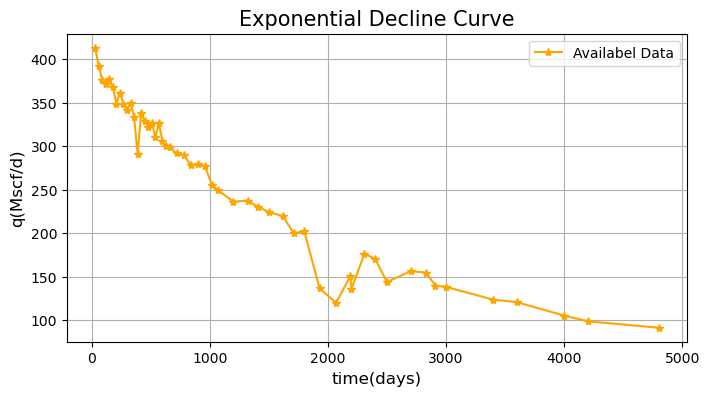

In [37]:
plt.style.use('default')
plt.figure(figsize=(8,4))

plt.plot(df['T(days)'], df['q(Mscf/d)'], marker='*', label='Availabel Data', color='orange')
plt.xlabel('time(days)', size=12)
plt.ylabel('q(Mscf/d)', size=12)
plt.title('Exponential Decline Curve', size=15)
plt.legend()
plt.grid()

In [131]:
b = np.log(413.3/377.5)/(260)

print(f"b is {b} per day!")

b is 0.0003484736647254127 per day!


In [134]:
def qexp_calc(t):
    
    qo = 413.3
    
    return qo*np.exp(-b*t)

t_future = np.arange(2800,4900,130)

q_future = qexp_calc(t_future)


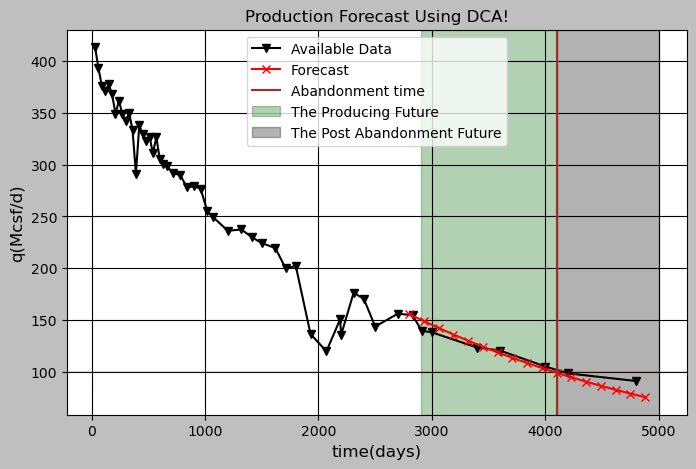

In [135]:
plt.style.use('grayscale')
plt.figure(figsize=(8,5))

plt.plot(df['T(days)'], df['q(Mscf/d)'], marker='v', label='Available Data')
plt.plot(t_future, q_future, color='red', marker='x', label='Forecast')


#plt.axvspan()

plt.axhline(y=100,color='brown', alpha=0.2)
plt.axvline(x=4100, color='brown', label='Abandonment time ')

plt.axvspan(2900,4100,color='darkgreen', alpha =0.3, label='The Producing Future')
plt.axvspan(4100,5000, color='black', alpha=0.3, label='The Post Abandonment Future')
plt.xlabel('time(days)',size=12)
plt.ylabel('q(Mcsf/d)',size=12)

plt.title('Production Forecast Using DCA!')

plt.legend()
plt.grid()

## Work on Exponential flow rate

In [159]:
data = pd.read_csv("PDC data.csv")

In [160]:
data.head()

,T(days),Gp,q(Mscf/d),Di,qi E,log q,m,Di.1,logq E
0,30,NaN,413.3,0.00174,392.283312,2.616265,-0.00010,0.00023,2.613265
1,60,NaN,392.8,NaN,353.867220,2.594171,0.00023,NaN,2.610265
2,90,NaN,375.9,NaN,321.422007,2.575072,NaN,NaN,2.607265
3,120,NaN,371.3,NaN,301.344077,2.569725,NaN,NaN,2.604265
4,150,NaN,377.5,NaN,290.796445,2.576917,NaN,NaN,2.601265


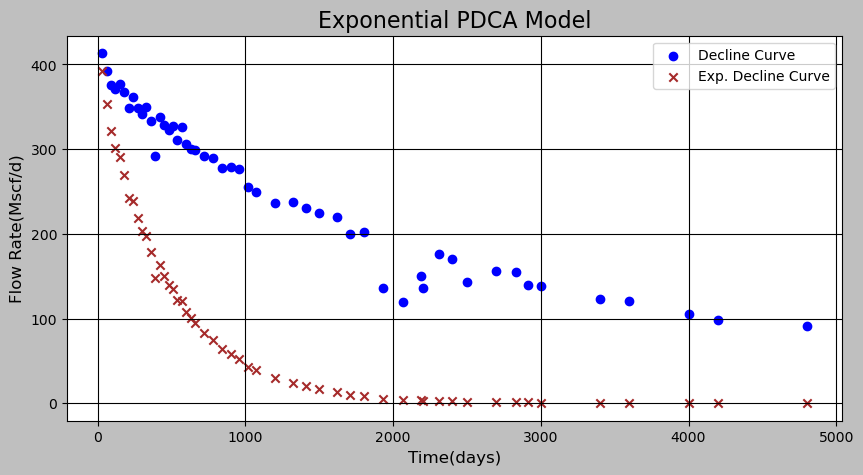

In [164]:
# create decline curve and Exponential decline

plt.style.use('grayscale')
plt.figure(figsize=(10,5))

plt.scatter(data['T(days)'],data['q(Mscf/d)'], marker='o',color='blue', label='Decline Curve')
plt.scatter(data['T(days)'], data['qi E'], marker='x', color='brown', label='Exp. Decline Curve')

plt.xlabel('Time(days)', size=12)
plt.ylabel('Flow Rate(Mscf/d)',size=12)
plt.title('Exponential PDCA Model', size=16)
plt.legend()
plt.grid()

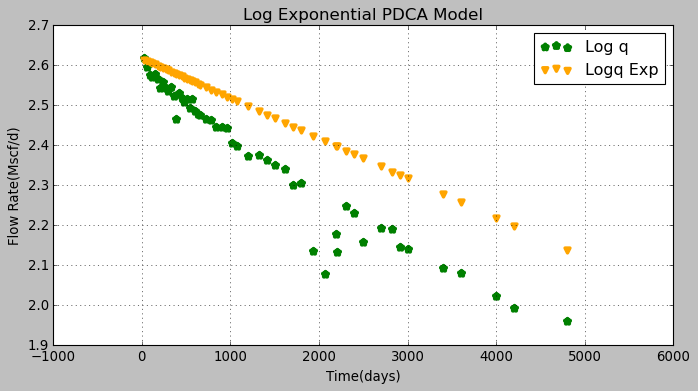

In [168]:
## Log q and logq E against time(days)

plt.figure(figsize=(10,5))
plt.style.use('grayscale')

plt.scatter(data['T(days)'], data['log q'], marker='*', label = 'Log q', color='green',lw=4)
plt.scatter(data['T(days)'], data['logq E'], marker='v', label='Logq Exp', color='orange',lw=3)

plt.ylabel('Flow Rate(Mscf/d)', size=12)
plt.xlabel('Time(days)', size=12)

plt.title("Log Exponential PDCA Model", size=15)
plt.grid()
plt.legend()
plt.show()